*Trabajo de Fin de Máster. Ingeniería del Software: Cloud, Datos y Gestión TI*

------

# Respuesta frente a la COVID-19: Un análisis de GitHub

##### *Jacinto José Ruiz Díaz*

## Capítulo 4.3. Búsqueda de usuarios

------

In [1]:
import requests
import json
import pandas as pd 
import time
from datetime import timedelta, datetime
import sys
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

from pandasgui import show

### Definición de colores y temas

In [2]:
color = sns.color_palette("rocket")
sns.set_theme()
rcParams['font.sans-serif'] = ['Cambria']
rcParams['font.size'] = 13.0

### Definición de token y cabecera

In [3]:
token = "" # Rellenar con token generado en GitHub
header = {'Authorization': 'token %s' % token}
wait_time = 2 #segundos de espera entre consultas

 ## Generación de usuarios

#### Lectura de repositorios

In [4]:
df = pd.read_csv('dataset_repositorios_final.csv')
df

,id,name,full_name,description,contributors_url,archived,disabled,stargazers_count,watchers_count,forks_count,...,has_projects,has_wiki,homepage,html_url,language,created_at,pushed_at,updated_at,svn_url,owner.login
0,238316428,COVID-19,CSSEGISandData/COVID-19,"Novel Coronavirus (COVID-19) Cases, provided b...",https://api.github.com/repos/CSSEGISandData/CO...,False,False,27211,27211,17432,...,True,True,https://systems.jhu.edu/research/public-health...,https://github.com/CSSEGISandData/COVID-19,NaN,2020-02-04T22:03:53Z,2021-08-14T11:35:08Z,2021-08-14T11:56:01Z,https://github.com/CSSEGISandData/COVID-19,CSSEGISandData
1,235374822,COVID-19,midas-network/COVID-19,2019 novel coronavirus repository,https://api.github.com/repos/midas-network/COV...,False,False,642,642,221,...,True,True,NaN,https://github.com/midas-network/COVID-19,TeX,2020-01-21T15:27:23Z,2021-08-12T20:15:14Z,2021-08-12T20:15:21Z,https://github.com/midas-network/COVID-19,midas-network
2,239777191,coronavirus,RamiKrispin/coronavirus,The coronavirus dataset,https://api.github.com/repos/RamiKrispin/coron...,False,False,394,394,175,...,True,True,https://ramikrispin.github.io/coronavirus/,https://github.com/RamiKrispin/coronavirus,R,2020-02-11T14:08:06Z,2021-08-14T08:19:49Z,2021-08-14T08:19:52Z,https://github.com/RamiKrispin/coronavirus,RamiKrispin
3,237129709,coronavirus,FoldingAtHome/coronavirus,Folding@home COVID-19 efforts,https://api.github.com/repos/FoldingAtHome/cor...,False,False,1115,1115,87,...,True,True,https://foldingathome.org,https://github.com/FoldingAtHome/coronavirus,Python,2020-01-30T03:12:19Z,2020-10-27T03:29:18Z,2021-08-09T21:17:36Z,https://github.com/FoldingAtHome/coronavirus,FoldingAtHome
4,234936988,ncov,nextstrain/ncov,Nextstrain build for novel coronavirus SARS-CoV-2,https://api.github.com/repos/nextstrain/ncov/c...,False,False,1208,1208,343,...,True,True,https://nextstrain.org/ncov,https://github.com/nextstrain/ncov,Python,2020-01-19T17:23:17Z,2021-08-13T12:36:06Z,2021-08-13T12:36:10Z,https://github.com/nextstrain/ncov,nextstrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178061,268856502,iot-contact-tracer,fwcd/iot-contact-tracer,Decentralized contact tracing system supportin...,https://api.github.com/repos/fwcd/iot-contact-...,False,False,1,1,0,...,True,True,NaN,https://github.com/fwcd/iot-contact-tracer,Dart,2020-06-02T16:46:15Z,2020-09-04T13:14:05Z,2020-09-04T15:03:54Z,https://github.com/fwcd/iot-contact-tracer,fwcd
178062,269479371,jupyter,kclhi/jupyter,:whale2: JupyterHub Docker configuration,https://api.github.com/repos/kclhi/jupyter/con...,False,False,2,2,0,...,True,True,https://kclhi.org,https://github.com/kclhi/jupyter,Python,2020-06-04T22:35:16Z,2021-06-11T18:23:39Z,2021-08-14T14:32:53Z,https://github.com/kclhi/jupyter,kclhi
178063,269527538,OpenWeatherMap-concat-histories,ALT-F1/OpenWeatherMap-concat-histories,Concatenate histories weather data collected b...,https://api.github.com/repos/ALT-F1/OpenWeathe...,False,False,1,1,0,...,True,True,http://www.alt-f1.be,https://github.com/ALT-F1/OpenWeatherMap-conca...,Python,2020-06-05T04:04:46Z,2021-08-12T13:30:11Z,2020-06-08T12:44:27Z,https://github.com/ALT-F1/OpenWeatherMap-conca...,ALT-F1
178064,270013759,frontend,Tackode/frontend,Frontend for Tackode,https://api.github.com/repos/Tackode/frontend/...,False,False,0,0,0,...,True,True,https://tackode.com,https://github.com/Tackode/frontend,Vue,2020-06-06T14:57:50Z,2021-08-12T04:05:02Z,2021-01-11T08:38:35Z,https://github.com/Tackode/frontend,Tackode


In [6]:
usernames = df['owner.login'].tolist()
repo_ids = df['id'].tolist()

In [31]:
cols = ["repo_id", "login", "bio", "blog", "company", "created_at", "followers", "location", "name", "type", "updated_at"]
res_df = pd.DataFrame(columns=cols)

i = 1

for id, username in zip(repo_ids, usernames):
    
    print("Esperando 0.5 segundos...")
    time.sleep(0.5) #Espera de 0.5 segundos
    
    response = requests.get('https://api.github.com/users/'+username, headers=header)
    response_json = response.json()
    print('---- Procesando URL: {} ----'.format(response.url))
    print("Creando dataframe...")
    
    if "id" not in response_json:
        print("***** Error al recuperar el usuario {}. Se rellenará con valores nulos *****".format(username))
        empty_df = pd.DataFrame(columns=cols)
        empty_df.loc[0] = None
        empty_df["repo_id"] = id
        empty_df["login"] = username
        res_df = res_df.append(empty_df)
        print("Tamaño actual dataframe: {}".format(res_df.shape[0]))
    else:
        df = pd.json_normalize(response_json)
        df.insert(0, "repo_id", id)
        res_df = res_df.append(df[cols])
        print("Tamaño actual dataframe: {}".format(res_df.shape[0]))
    
    # Cada 500 consultas, se exporta un fichero CSV acumulando el dataframe generado
    if i % 500 == 0:
        res_df.to_csv(r'usuarios_'+ str(i) +'.csv', index = False, encoding="utf-8-sig")
        
    i += 1

res_df.to_csv(r'usuarios_total.csv', index = False, encoding="utf-8-sig")

Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Juniorexz ----
Creando dataframe...
Tamaño actual dataframe: 176425
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ritwikamukherjee ----
Creando dataframe...
Tamaño actual dataframe: 176426
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Sumit489 ----
Creando dataframe...
Tamaño actual dataframe: 176427
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/saurabh10022000 ----
Creando dataframe...
Tamaño actual dataframe: 176428
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/SelimHorri ----
Creando dataframe...
Tamaño actual dataframe: 176429
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/covh ----
Creando dataframe...
Tamaño actual dataframe: 176430
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/gmcruz123 ----
Creando dataframe...
Tamaño actual da

---- Procesando URL: https://api.github.com/users/FernandoGreco ----
Creando dataframe...
Tamaño actual dataframe: 176482
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/SwetaTheBest ----
Creando dataframe...
Tamaño actual dataframe: 176483
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/jningtho ----
Creando dataframe...
Tamaño actual dataframe: 176484
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/RadySonabu ----
Creando dataframe...
Tamaño actual dataframe: 176485
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/xdossantos ----
Creando dataframe...
Tamaño actual dataframe: 176486
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/oduwsdl ----
Creando dataframe...
Tamaño actual dataframe: 176487
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/leopapa67 ----
Creando dataframe...
Tamaño actual dataframe: 176488
Esperando 0.

---- Procesando URL: https://api.github.com/users/cjzheng01 ----
Creando dataframe...
Tamaño actual dataframe: 176539
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/issahezron ----
Creando dataframe...
Tamaño actual dataframe: 176540
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ravi1045teja ----
Creando dataframe...
Tamaño actual dataframe: 176541
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/railslove ----
Creando dataframe...
Tamaño actual dataframe: 176542
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/railslove ----
Creando dataframe...
Tamaño actual dataframe: 176543
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/diaprilia ----
Creando dataframe...
Tamaño actual dataframe: 176544
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ddachkinov ----
Creando dataframe...
Tamaño actual dataframe: 176545
Esperando 0.5

---- Procesando URL: https://api.github.com/users/joelsewhere ----
Creando dataframe...
Tamaño actual dataframe: 176596
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/mehulk-5245 ----
Creando dataframe...
Tamaño actual dataframe: 176597
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/drphloem ----
Creando dataframe...
Tamaño actual dataframe: 176598
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/louisse24 ----
Creando dataframe...
Tamaño actual dataframe: 176599
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ajitpradhan925 ----
Creando dataframe...
Tamaño actual dataframe: 176600
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/GDGToulouse ----
Creando dataframe...
Tamaño actual dataframe: 176601
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/nshyam97 ----
Creando dataframe...
Tamaño actual dataframe: 176602
Esperando

---- Procesando URL: https://api.github.com/users/spelletier-1345 ----
Creando dataframe...
Tamaño actual dataframe: 176653
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/alfianyusufabdullah ----
Creando dataframe...
Tamaño actual dataframe: 176654
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/cark1 ----
Creando dataframe...
Tamaño actual dataframe: 176655
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/tauphik257 ----
Creando dataframe...
Tamaño actual dataframe: 176656
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/TKoteswarRao ----
Creando dataframe...
Tamaño actual dataframe: 176657
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/GarryLaly ----
Creando dataframe...
Tamaño actual dataframe: 176658
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/indiegoxx ----
Creando dataframe...
Tamaño actual dataframe: 176659
Es

---- Procesando URL: https://api.github.com/users/1998code ----
Creando dataframe...
Tamaño actual dataframe: 176709
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/theepag ----
Creando dataframe...
Tamaño actual dataframe: 176710
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/PrincetonPoh ----
Creando dataframe...
Tamaño actual dataframe: 176711
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/daniloPro21 ----
Creando dataframe...
Tamaño actual dataframe: 176712
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ccidecio ----
Creando dataframe...
Tamaño actual dataframe: 176713
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/nithin42 ----
Creando dataframe...
Tamaño actual dataframe: 176714
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/QIDSOD ----
Creando dataframe...
Tamaño actual dataframe: 176715
Esperando 0.5 segundo

---- Procesando URL: https://api.github.com/users/quoclewpg ----
Creando dataframe...
Tamaño actual dataframe: 176766
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/dsouzajoy ----
Creando dataframe...
Tamaño actual dataframe: 176767
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/AndrewMacatangay ----
Creando dataframe...
Tamaño actual dataframe: 176768
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/LuciferNico ----
Creando dataframe...
Tamaño actual dataframe: 176769
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/meddiouani ----
Creando dataframe...
Tamaño actual dataframe: 176770
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/TaYaKi71751 ----
Creando dataframe...
Tamaño actual dataframe: 176771
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/elshaka ----
Creando dataframe...
Tamaño actual dataframe: 176772
Esperand

---- Procesando URL: https://api.github.com/users/codefordayton ----
Creando dataframe...
Tamaño actual dataframe: 176823
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/chinatimeline ----
Creando dataframe...
Tamaño actual dataframe: 176824
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/CodeForBaltimore ----
Creando dataframe...
Tamaño actual dataframe: 176825
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/broadinstitute ----
Creando dataframe...
Tamaño actual dataframe: 176826
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/cirosantilli ----
Creando dataframe...
Tamaño actual dataframe: 176827
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/CodeForBaltimore ----
Creando dataframe...
Tamaño actual dataframe: 176828
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/wuhan-support ----
Creando dataframe...
Tamaño actual da

---- Procesando URL: https://api.github.com/users/codeKgu ----
Creando dataframe...
Tamaño actual dataframe: 176880
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/batman004 ----
Creando dataframe...
Tamaño actual dataframe: 176881
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/StudentsAgainstCovid19 ----
Creando dataframe...
Tamaño actual dataframe: 176882
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/doerfli ----
Creando dataframe...
Tamaño actual dataframe: 176883
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Rosangelafl ----
Creando dataframe...
Tamaño actual dataframe: 176884
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/McCio ----
Creando dataframe...
Tamaño actual dataframe: 176885
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/mucholian ----
Creando dataframe...
Tamaño actual dataframe: 176886
Esperando 0

---- Procesando URL: https://api.github.com/users/carrieprice78 ----
Creando dataframe...
Tamaño actual dataframe: 176937
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/JuanGallard0 ----
Creando dataframe...
Tamaño actual dataframe: 176938
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/baez90 ----
Creando dataframe...
Tamaño actual dataframe: 176939
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/kunalpat25 ----
Creando dataframe...
Tamaño actual dataframe: 176940
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/deathook007 ----
Creando dataframe...
Tamaño actual dataframe: 176941
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/gmr ----
Creando dataframe...
Tamaño actual dataframe: 176942
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Untori ----
Creando dataframe...
Tamaño actual dataframe: 176943
Esperando 0.5 segund

---- Procesando URL: https://api.github.com/users/MGijon ----
Creando dataframe...
Tamaño actual dataframe: 176994
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/web-sys1 ----
Creando dataframe...
Tamaño actual dataframe: 176995
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/qkdxorjs1002 ----
Creando dataframe...
Tamaño actual dataframe: 176996
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/asanoviskhak ----
Creando dataframe...
Tamaño actual dataframe: 176997
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/aarpit1010 ----
Creando dataframe...
Tamaño actual dataframe: 176998
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/oem ----
Creando dataframe...
Tamaño actual dataframe: 176999
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/CarmineMinichini ----
Creando dataframe...
Tamaño actual dataframe: 177000
Esperando 0.5 

---- Procesando URL: https://api.github.com/users/ShagunSharma98 ----
Creando dataframe...
Tamaño actual dataframe: 177050
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Code-for-All ----
Creando dataframe...
Tamaño actual dataframe: 177051
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177052
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coreyward ----
Creando dataframe...
Tamaño actual dataframe: 177053
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/TebogoNakampe ----
Creando dataframe...
Tamaño actual dataframe: 177054
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Techno-Disaster ----
Creando dataframe...
Tamaño actual dataframe: 177055
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/stefancrain ----
Creando dataframe...
Tamaño actual dataframe: 1770

---- Procesando URL: https://api.github.com/users/lpmatos ----
Creando dataframe...
Tamaño actual dataframe: 177107
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/KimaruThagna ----
Creando dataframe...
Tamaño actual dataframe: 177108
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/brymut ----
Creando dataframe...
Tamaño actual dataframe: 177109
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/andyle13 ----
Creando dataframe...
Tamaño actual dataframe: 177110
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/utribedi ----
Creando dataframe...
Tamaño actual dataframe: 177111
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/winstonjay ----
Creando dataframe...
Tamaño actual dataframe: 177112
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/afiqharith ----
Creando dataframe...
Tamaño actual dataframe: 177113
Esperando 0.5 segund

---- Procesando URL: https://api.github.com/users/girlscript-blr ----
Creando dataframe...
Tamaño actual dataframe: 177164
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/pitang1965 ----
Creando dataframe...
Tamaño actual dataframe: 177165
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/josemmo ----
Creando dataframe...
Tamaño actual dataframe: 177166
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Vikramshinde1210 ----
Creando dataframe...
Tamaño actual dataframe: 177167
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/KunalFarmah98 ----
Creando dataframe...
Tamaño actual dataframe: 177168
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/OptimalLockdown ----
Creando dataframe...
Tamaño actual dataframe: 177169
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/enrichman ----
Creando dataframe...
Tamaño actual dataframe: 1771

---- Procesando URL: https://api.github.com/users/Aarav-Patel ----
Creando dataframe...
Tamaño actual dataframe: 177220
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/electronixxx ----
Creando dataframe...
Tamaño actual dataframe: 177221
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronamex ----
Creando dataframe...
Tamaño actual dataframe: 177222
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ingomc ----
Creando dataframe...
Tamaño actual dataframe: 177223
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/bastelgarage ----
Creando dataframe...
Tamaño actual dataframe: 177224
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coloradodigitalservice ----
Creando dataframe...
Tamaño actual dataframe: 177225
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/gumbo-millennium ----
Creando dataframe...
Tamaño actual dataframe: 

---- Procesando URL: https://api.github.com/users/Covexit ----
Creando dataframe...
Tamaño actual dataframe: 177277
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/covidclinical ----
Creando dataframe...
Tamaño actual dataframe: 177278
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177279
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/msghera ----
Creando dataframe...
Tamaño actual dataframe: 177280
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Pandemic-Resource-Team ----
Creando dataframe...
Tamaño actual dataframe: 177281
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/rvalla ----
Creando dataframe...
Tamaño actual dataframe: 177282
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/dantam ----
Creando dataframe...
Tamaño actual dataframe: 177283
Esperando 

---- Procesando URL: https://api.github.com/users/Funnyman420 ----
Creando dataframe...
Tamaño actual dataframe: 177334
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/axelboberg ----
Creando dataframe...
Tamaño actual dataframe: 177335
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coverified ----
Creando dataframe...
Tamaño actual dataframe: 177336
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/paul-em ----
Creando dataframe...
Tamaño actual dataframe: 177337
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/aaei924 ----
Creando dataframe...
Tamaño actual dataframe: 177338
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/azurast ----
Creando dataframe...
Tamaño actual dataframe: 177339
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/StefanoCasagrande ----
Creando dataframe...
Tamaño actual dataframe: 177340
Esperando 0.

---- Procesando URL: https://api.github.com/users/MarcoBuster ----
Creando dataframe...
Tamaño actual dataframe: 177391
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/KrishSkywalker ----
Creando dataframe...
Tamaño actual dataframe: 177392
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/jobranch2019 ----
Creando dataframe...
Tamaño actual dataframe: 177393
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/gpriya32 ----
Creando dataframe...
Tamaño actual dataframe: 177394
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ButterBean79 ----
Creando dataframe...
Tamaño actual dataframe: 177395
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/garsella7 ----
Creando dataframe...
Tamaño actual dataframe: 177396
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Pergamono ----
Creando dataframe...
Tamaño actual dataframe: 177397
Espera

---- Procesando URL: https://api.github.com/users/PatriceRobin ----
Creando dataframe...
Tamaño actual dataframe: 177448
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/arthurfortes ----
Creando dataframe...
Tamaño actual dataframe: 177449
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177450
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177451
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/zebbra ----
Creando dataframe...
Tamaño actual dataframe: 177452
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/nvarcha ----
Creando dataframe...
Tamaño actual dataframe: 177453
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/keepyourdistanceclub ----
Creando dataframe...
Tamaño actual dataframe: 177454
Espe

---- Procesando URL: https://api.github.com/users/ThePyProgrammer ----
Creando dataframe...
Tamaño actual dataframe: 177505
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/tejzpr ----
Creando dataframe...
Tamaño actual dataframe: 177506
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/sysbiolux ----
Creando dataframe...
Tamaño actual dataframe: 177507
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/project-coswara ----
Creando dataframe...
Tamaño actual dataframe: 177508
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177509
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/philsawicki ----
Creando dataframe...
Tamaño actual dataframe: 177510
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177511
Esper

---- Procesando URL: https://api.github.com/users/sil-ai ----
Creando dataframe...
Tamaño actual dataframe: 177562
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ohioh ----
Creando dataframe...
Tamaño actual dataframe: 177563
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/MungLAW ----
Creando dataframe...
Tamaño actual dataframe: 177564
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177565
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/chandanbiswas08 ----
Creando dataframe...
Tamaño actual dataframe: 177566
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/oidacra ----
Creando dataframe...
Tamaño actual dataframe: 177567
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/yaa9oub ----
Creando dataframe...
Tamaño actual dataframe: 177568
Esperando 0.5 segundos..

---- Procesando URL: https://api.github.com/users/K-G-PRAJWAL ----
Creando dataframe...
Tamaño actual dataframe: 177619
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/codefordayton ----
Creando dataframe...
Tamaño actual dataframe: 177620
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/fabricandofitfaber ----
Creando dataframe...
Tamaño actual dataframe: 177621
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/rearc-data ----
Creando dataframe...
Tamaño actual dataframe: 177622
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ankitdobhal ----
Creando dataframe...
Tamaño actual dataframe: 177623
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/born-2learn ----
Creando dataframe...
Tamaño actual dataframe: 177624
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ManojCS1999 ----
Creando dataframe...
Tamaño actual dataframe: 177

---- Procesando URL: https://api.github.com/users/iamarjun ----
Creando dataframe...
Tamaño actual dataframe: 177676
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/hrishiksh ----
Creando dataframe...
Tamaño actual dataframe: 177677
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/vinodnimbalkar ----
Creando dataframe...
Tamaño actual dataframe: 177678
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/mrout94 ----
Creando dataframe...
Tamaño actual dataframe: 177679
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/alexanderciuffreda ----
Creando dataframe...
Tamaño actual dataframe: 177680
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/shameempk ----
Creando dataframe...
Tamaño actual dataframe: 177681
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/sarthakgupta072 ----
Creando dataframe...
Tamaño actual dataframe: 177682
E

---- Procesando URL: https://api.github.com/users/missing-user ----
Creando dataframe...
Tamaño actual dataframe: 177733
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Cooperacion-Ciudadana ----
Creando dataframe...
Tamaño actual dataframe: 177734
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/buddhikasemasinghe ----
Creando dataframe...
Tamaño actual dataframe: 177735
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/CHAITron ----
Creando dataframe...
Tamaño actual dataframe: 177736
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/alfonsrv ----
Creando dataframe...
Tamaño actual dataframe: 177737
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/prasoonsoni ----
Creando dataframe...
Tamaño actual dataframe: 177738
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/sujeendran ----
Creando dataframe...
Tamaño actual dataframe: 

---- Procesando URL: https://api.github.com/users/elateifsara ----
Creando dataframe...
Tamaño actual dataframe: 177790
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/jonasmzsouza ----
Creando dataframe...
Tamaño actual dataframe: 177791
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/hrbrmstr ----
Creando dataframe...
Tamaño actual dataframe: 177792
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/ambikak2018 ----
Creando dataframe...
Tamaño actual dataframe: 177793
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/fitranpramakrisna ----
Creando dataframe...
Tamaño actual dataframe: 177794
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Oyopiz ----
Creando dataframe...
Tamaño actual dataframe: 177795
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/gmm ----
Creando dataframe...
Tamaño actual dataframe: 177796
Esperando 0.5

---- Procesando URL: https://api.github.com/users/YashGovekar ----
Creando dataframe...
Tamaño actual dataframe: 177847
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/PoojaDasIndia ----
Creando dataframe...
Tamaño actual dataframe: 177848
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177849
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/D-S-Software ----
Creando dataframe...
Tamaño actual dataframe: 177850
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/MasterFinHEC ----
Creando dataframe...
Tamaño actual dataframe: 177851
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Musca23 ----
Creando dataframe...
Tamaño actual dataframe: 177852
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/laxmanbalaraman ----
Creando dataframe...
Tamaño actual dataframe: 177853
E

---- Procesando URL: https://api.github.com/users/OpenCovidTrace ----
Creando dataframe...
Tamaño actual dataframe: 177904
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/emreyh ----
Creando dataframe...
Tamaño actual dataframe: 177905
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/emreesen27 ----
Creando dataframe...
Tamaño actual dataframe: 177906
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/maxlibin ----
Creando dataframe...
Tamaño actual dataframe: 177907
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/jwatowatson ----
Creando dataframe...
Tamaño actual dataframe: 177908
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/tjxie ----
Creando dataframe...
Tamaño actual dataframe: 177909
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/coronasafe ----
Creando dataframe...
Tamaño actual dataframe: 177910
Esperando 0.5 seg

---- Procesando URL: https://api.github.com/users/Narcodz ----
Creando dataframe...
Tamaño actual dataframe: 177961
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/cypherkunp ----
Creando dataframe...
Tamaño actual dataframe: 177962
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/FANNY-20 ----
Creando dataframe...
Tamaño actual dataframe: 177963
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/afdezcl ----
Creando dataframe...
Tamaño actual dataframe: 177964
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/pxthxk ----
Creando dataframe...
Tamaño actual dataframe: 177965
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/devonsparks ----
Creando dataframe...
Tamaño actual dataframe: 177966
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Techniack ----
Creando dataframe...
Tamaño actual dataframe: 177967
Esperando 0.5 segundos.

---- Procesando URL: https://api.github.com/users/anu-rock ----
Creando dataframe...
Tamaño actual dataframe: 178018
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/jersonlatorre ----
Creando dataframe...
Tamaño actual dataframe: 178019
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/Morikka ----
Creando dataframe...
Tamaño actual dataframe: 178020
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/vnsny-bia ----
Creando dataframe...
Tamaño actual dataframe: 178021
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/purushottamkar ----
Creando dataframe...
Tamaño actual dataframe: 178022
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/billpugh ----
Creando dataframe...
Tamaño actual dataframe: 178023
Esperando 0.5 segundos...
---- Procesando URL: https://api.github.com/users/RGBHack ----
Creando dataframe...
Tamaño actual dataframe: 178024
Esperando 0.5 s

---

## Limpieza y preprocesamiento

### Selección de usuarios válidos

In [3]:
df_usuarios = pd.read_csv('usuarios_total.csv')
df_usuarios

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z
...,...,...,...,...,...,...,...,...,...,...,...
178061,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z
178062,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
178063,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z
178064,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z


Quitamos los usuarios que crearon los 27 repositorios no válidos, descartados a posteriori en el análisis manual hecho en el apartado "Repositorios creados antes de declararse pandemia" del Notebook Visualizaciones.

In [4]:
invalidos = [2618529, 7797677, 34158241, 42319556, 42321742, 46790113, 63896251, 64085813, 106683801, 105979787, 
             183196269, 196332961, 225646868, 195876578,  209656058, 231134405, 216056228, 140326771, 172798234, 
             229122289, 21244714, 93610140, 175701328, 194225243, 150090997, 197573508, 213540232]

In [5]:
df_usuarios = df_usuarios[~df_usuarios['repo_id'].isin(invalidos)]
df_usuarios

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z
...,...,...,...,...,...,...,...,...,...,...,...
178061,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z
178062,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
178063,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z
178064,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z


Nos quedamos solo con los usuarios válidos, aquellos cuya fecha de creación no es nula:

In [6]:
usuarios_validos = df_usuarios[df_usuarios["created_at"].notnull()]

In [7]:
usuarios_validos

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z
...,...,...,...,...,...,...,...,...,...,...,...
178061,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z
178062,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
178063,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z
178064,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z


In [10]:
df_usuarios.shape[0] - usuarios_validos.shape[0]

217

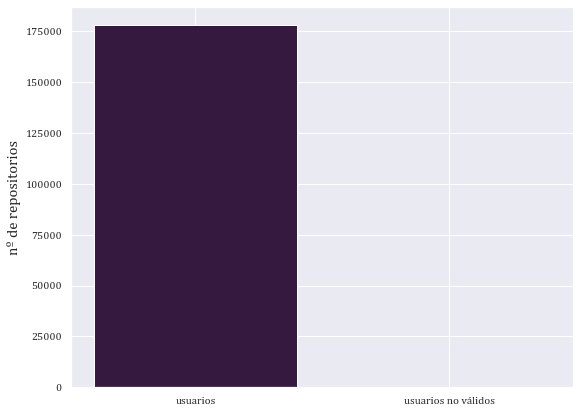

In [11]:
x = ["usuarios", "usuarios no válidos"]
y = [df_usuarios.shape[0], df_usuarios.shape[0] - usuarios_validos.shape[0]]

plt.figure(figsize=(9,7))
plt.bar(x, y, color=color, align = 'center')
plt.ylabel('nº de repositorios', size=15)


plt.show()

La proporción es demasiado grande para la cifra insignificante de usuarios no válidos (217).

Exportamos este dataframe a CSV:

In [8]:
usuarios_validos.to_csv(r'usuarios_total_validos.csv', index = False, encoding="utf-8-sig")

### Usuarios válidos

Lo leemos directamente:

In [40]:
usuarios_validos = pd.read_csv("usuarios_total_validos.csv")
usuarios_validos

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z
...,...,...,...,...,...,...,...,...,...,...,...
177817,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z
177820,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z


## Localización de usuarios

### Nombres de usuarios únicos

In [41]:
usuarios_unicos = usuarios_validos.drop_duplicates(subset = "login")
usuarios_unicos

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z
...,...,...,...,...,...,...,...,...,...,...,...
177814,268856502,fwcd,CS and math student.,NaN,Kiel University,2017-08-09T17:01:53Z,80.0,Germany,FW,User,2021-08-17T12:02:01Z
177816,269601203,StefH,https://twitter.com/sheyenrath,https://sourcerer.io/stefh,mStack.nl,2010-04-22T14:46:51Z,113.0,NL,Stef Heyenrath,User,2021-08-28T07:04:11Z
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z


### Repositorios de usuarios que tienen relleno el campo _location_

In [42]:
usuarios_con_location = usuarios_unicos[usuarios_unicos["location"].notnull()]
usuarios_con_location

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
5,238601449,ExpDev07,"20 years old. Experience in PHP, Laravel, Java...",NaN,NaN,2014-12-01T10:11:30Z,155.0,Norway,Marius,User,2021-08-24T22:02:10Z
6,237817105,JohnCoene,"R, Go, JavaScript, and other indoor stuff.",john-coene.com,@devOpifex,2014-06-09T01:35:43Z,613.0,"Geneva, Switzerland",John (JP) Coene,User,2021-08-28T18:33:06Z
...,...,...,...,...,...,...,...,...,...,...,...
177814,268856502,fwcd,CS and math student.,NaN,Kiel University,2017-08-09T17:01:53Z,80.0,Germany,FW,User,2021-08-17T12:02:01Z
177816,269601203,StefH,https://twitter.com/sheyenrath,https://sourcerer.io/stefh,mStack.nl,2010-04-22T14:46:51Z,113.0,NL,Stef Heyenrath,User,2021-08-28T07:04:11Z
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z


### Obtener el país a través de la localización

In [43]:
locations = pd.DataFrame(usuarios_con_location["location"])
locations

,location
0,"Baltimore, MD"
2,"Cupertino, California, US"
3,WUSTL
5,Norway
6,"Geneva, Switzerland"
...,...
177814,Germany
177816,NL
177818,South Africa
177819,India


#### A través de la librería *geotext*

In [44]:
from geotext import GeoText

In [45]:
def get_country_code(df):
    location = GeoText(df['location']).country_mentions
    pais = list(location)
    if pais:
        return pais[0]

In [46]:
locations['country_code'] = locations.apply(get_country_code, axis = 1)
locations

,location,country_code
0,"Baltimore, MD",US
2,"Cupertino, California, US",US
3,WUSTL,None
5,Norway,NO
6,"Geneva, Switzerland",CH
...,...,...
177814,Germany,DE
177816,NL,None
177818,South Africa,ZA
177819,India,IN


Comprobamos cuántas *locations* no ha podido descifrar:

In [47]:
null_locations = locations[locations["country_code"].isnull()]
null_locations

,location,country_code
3,WUSTL,None
15,Sydney Australia,None
32,"Notre Dame, IN",None
34,Asia-Pacific,None
43,England,None
...,...,...
177764,Bengaluru,None
177776,Bancak Gunungwungkal Pati Jawa Tengah,None
177777,Allahabad,None
177782,北京,None


In [11]:
show(null_locations)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Procedemos a eliminarlo del dataframe *locations*:

In [48]:
locations = locations[~locations["country_code"].isnull()]
locations

,location,country_code
0,"Baltimore, MD",US
2,"Cupertino, California, US",US
5,Norway,NO
6,"Geneva, Switzerland",CH
7,"Guangzhou, China",CN
...,...,...
177811,United States,US
177814,Germany,DE
177818,South Africa,ZA
177819,India,IN


In [13]:
show(locations)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


### Añadiendo manualmente los *country_code*

Muchas se ven a simple vista cuáles son, aunque no ha sido capaz de reconocerlas. Las añadiremos a mano. Para ello exportamos a CSV el dataframe con los usuarios sin locations:

In [28]:
null_locations.to_csv(r'locations_no_encontradas.csv', encoding="utf-8-sig")

En un fichero Excel edité y añadí manualmente el *country_code* de los países que pude detectar en función de las ciudades/estados. Hay que tener en cuenta que son casi 12.000 filas y manualmente es una labor excesiva para el resultado final y no es el objetivo de este proyecto alcanzar la perfección en esta etapa.

In [49]:
df_rellenos = pd.read_excel(open('paises_anadidos_manualmente.xlsx','rb'), index_col=[0])
df_rellenos

,location,country_code
159424,86,NaN
33451,404,NaN
31236,6470,NaN
26846,10485.96,NaN
157871,20850,NaN
...,...,...
93581,茨城県つくば市,NaN
66544,贵阳 邮箱490840648@qq.com,NaN
66359,越谷市,NaN
80308,陕西省西安,NaN


De los 11.709 usuarios, vemos cuántos he dejado vacío (por contener nombres inválidos, no descriptivos y no dedicar más de 4 horas en esta tarea):

In [50]:
df_rellenos.country_code.isnull().sum()

4244

Por lo que he rellenado el 63,7% (7.465) de los usuarios.

Eliminamos los valores nulos y añadimos el resto al dataset anterior:

In [51]:
df_rellenos_sin_nulos = df_rellenos[~df_rellenos.country_code.isnull()]
df_rellenos_sin_nulos

,location,country_code
103447,Bangaldesh,BD
49529,Kaiserslautern Germany,DE
72240,Untied Kingdom,GB
121622,USA,US
126711,"#1062, 15th Cross, 25th Main, BSK 2nd Stage, B...",IN
...,...,...
39000,日本,JP
88437,日本,JP
93517,日本,JP
144527,日本,JP


In [52]:
locations = locations.append(df_rellenos_sin_nulos)
locations

,location,country_code
0,"Baltimore, MD",US
2,"Cupertino, California, US",US
5,Norway,NO
6,"Geneva, Switzerland",CH
7,"Guangzhou, China",CN
...,...,...
39000,日本,JP
88437,日本,JP
93517,日本,JP
144527,日本,JP


Y exportamos el resultado a CSV para no perder el progreso:

In [33]:
locations.to_csv(r'locations_totales_anadidas.csv', index = False, encoding="utf-8-sig")

Para pasar del *Country Code* que genera **geotext** al nombre del país, tenemos que usar la librería **pycountry**:

In [53]:
import pycountry

In [60]:
# Añadimos keep_default_na a False porque detecta el country_code de Namibia (NA) como valor Nulo (NaN)
locations = pd.read_csv("locations_totales_anadidas.csv", keep_default_na=False)

In [61]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]   

def get_country_name(df):
    if (df['country_code'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['country_code']).name

In [62]:
locations['country_name'] = locations.apply(get_country_name, axis = 1)
locations

,location,country_code,country_name
0,"Baltimore, MD",US,United States
1,"Cupertino, California, US",US,United States
2,Norway,NO,Norway
3,"Geneva, Switzerland",CH,Switzerland
4,"Guangzhou, China",CN,China
...,...,...,...
62419,日本,JP,Japan
62420,日本,JP,Japan
62421,日本,JP,Japan
62422,日本,JP,Japan


In [66]:
show(locations)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [64]:
locations_null = locations[locations['country_name'].isnull()]
locations_null

,location,country_code,country_name
12382,"Prishtina, Kosovo",XK,None
14850,"Viti, Kosovo",XK,None
29196,Kosovo,XK,None
34177,Kosovo,XK,None
46748,Pristina,XK,None
50307,"Pristina, Kosovo",XK,None
52840,Kosovo,XK,None
53558,Gjilan,XK,None
60838,Seongnam,KS,None
60839,Seongnam,KS,None


In [65]:
locations_null.shape[0]

35

Renombramos estos países conociendo a cuáles pertenecen sus *country_code*

In [69]:
locations.loc[locations.country_code == "XK", "country_name"] = "Kosovo"
locations.loc[locations.country_code == "KS", "country_name"] = "Korea, Republic of"

In [71]:
locations.loc[locations.country_code == "KS", "country_code"] = "KR"

In [72]:
show(locations)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [70]:
locations_null = locations[locations['country_name'].isnull()]
locations_null

,location,country_code,country_name


No hay más valores nulos.

Finalmente se exporta a CSV:

In [73]:
locations.to_csv(r'locations_con_cc_y_cn.csv', index = False, encoding="utf-8-sig")

--------

## Actualizando el dataset original de usuarios con las columnas de *country_code* y *country_name*

In [95]:
usuarios_validos = pd.read_csv("usuarios_total_validos.csv")
usuarios_validos

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z
...,...,...,...,...,...,...,...,...,...,...,...
177817,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z
177820,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z


#### Country_code

In [96]:
locations_existentes = pd.read_csv("locations_con_cc_y_cn.csv", keep_default_na=False)

locs = locations_existentes.location.tolist()
country_code = locations_existentes.country_code.tolist()
zip_iterator = zip(locs, country_code)

diccionario_locations_country_code = dict(zip_iterator)

In [97]:
def get_existing_country_code(df, diccionario):

    if df['location'] in diccionario:
        return diccionario.get(df['location'])

In [98]:
usuarios_validos['country_code'] = usuarios_validos.apply(get_existing_country_code, args=(diccionario_locations_country_code,), axis = 1)
usuarios_validos

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at,country_code
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z,US
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z,None
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z,US
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z,US
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z,None
...,...,...,...,...,...,...,...,...,...,...,...,...
177817,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z,BE
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z,ZA
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z,IN
177820,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z,US


#### Country_name

In [99]:
locations_existentes = pd.read_csv("locations_con_cc_y_cn.csv", keep_default_na=False)

locs = locations_existentes.location.tolist()
country_name = locations_existentes.country_name.tolist()
zip_iterator = zip(locs, country_name)

diccionario_locations_country_name = dict(zip_iterator)

In [100]:
def get_existing_country_name(df, diccionario):

    if df['location'] in diccionario:
        return diccionario.get(df['location'])

In [101]:
usuarios_validos['country_name'] = usuarios_validos.apply(get_existing_country_name, args=(diccionario_locations_country_name,), axis = 1)
usuarios_validos

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at,country_code,country_name
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z,US,United States
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z,None,None
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z,US,United States
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z,US,United States
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177817,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z,BE,Belgium
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z,ZA,South Africa
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z,IN,India
177820,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z,US,United States


In [ ]:
show(usuarios_validos)

### Exportación

Exportamos a CSV el dataset de usuarios actualizado con los campos de países añadidos:

In [109]:
usuarios_validos.to_csv(r'usuarios_totales_con_paises.csv', index = False, encoding="utf-8-sig")

Para lidiar con la detección de "NA" como nulo por parte de Pandas, definimos los valores que sean tomados como nulos y lo aplicamos cuando procedamos a la lectura:

In [110]:
na_values = ['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
             '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', '']

usuarios_totales_con_paises = pd.read_csv("usuarios_totales_con_paises.csv", na_values=na_values, keep_default_na=False)
usuarios_totales_con_paises

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at,country_code,country_name
0,238316428,CSSEGISandData,NaN,https://systems.jhu.edu/,CSSE at Johns Hopkins University,2020-02-04T22:02:23Z,3101.0,"Baltimore, MD",NaN,User,2021-08-23T13:11:11Z,US,United States
1,235374822,midas-network,The MIDAS Network is funded by the National In...,NaN,NaN,2019-05-08T14:56:50Z,0.0,NaN,MIDAS Network,Organization,2021-08-16T16:14:15Z,NaN,NaN
2,239777191,RamiKrispin,"Data scientist, 📦 developer, author, #rstats, ...",https://ramikrispin.github.io/,NaN,2015-06-05T09:56:59Z,669.0,"Cupertino, California, US",Rami Krispin,User,2021-04-13T21:43:59Z,US,United States
3,237129709,FoldingAtHome,NaN,https://foldingathome.org/,NaN,2013-04-16T01:20:37Z,0.0,WUSTL,Folding@home,Organization,2021-07-12T14:38:21Z,US,United States
4,234936988,nextstrain,Real-time tracking of pathogen evolution,https://nextstrain.org,NaN,2016-09-12T21:55:44Z,0.0,NaN,Nextstrain,Organization,2021-04-22T16:46:07Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177817,269527538,ALT-F1,"Design, Build, Test, Deploy and Maintain large...",http://www.alt-f1.be,NaN,2011-06-21T00:01:55Z,0.0,"Brussels, Belgium","ALT-F1 supports your industry with SOFTWARE, D...",Organization,2020-12-30T22:36:58Z,BE,Belgium
177818,270034436,marvinIsSacul,Just a little bit curious.,NaN,@ikhokha,2018-10-04T06:11:53Z,0.0,South Africa,Marvin Kagiso,User,2021-08-18T08:37:09Z,ZA,South Africa
177819,269906994,jahnavi-prasad,NaN,www.linkedin.com/in/jahnaviprasad,https://jahnaviprasad.tech/,2018-08-13T17:23:30Z,19.0,India,Jahnavi Prasad,User,2021-08-19T14:54:45Z,IN,India
177820,270013759,Tackode,NaN,https://tackode.com,NaN,2020-06-06T14:27:00Z,0.0,Paris,Tackode,Organization,2021-08-16T17:01:02Z,US,United States


In [90]:
show(usuarios_total_con_paises)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [107]:
ust = usuarios_total_con_paises[usuarios_total_con_paises.country_code == "NA"]
ust

,repo_id,login,bio,blog,company,created_at,followers,location,name,type,updated_at,country_code,country_name
44344,290416767,otherdcn,NaN,https://www.dancntwari.com,NaN,2016-10-01T19:32:33Z,0.0,"Windhoek, Namibia",Dan,User,2021-07-11T14:59:54Z,NA,Namibia
54826,299103690,kunwijik,NaN,NaN,University of Namibia,2014-09-17T14:58:33Z,2.0,"Windhoek, Namibia",Eli Kasai,User,2021-05-12T03:14:53Z,NA,Namibia
102559,253815348,Bruck1701,Python and Ruby developer with experience in s...,NaN,NaN,2016-03-07T20:44:54Z,5.0,Digital Nomad currently in Namibia,Bruno Kümmel,User,2021-05-26T12:40:33Z,NA,Namibia
174327,283018984,joachim-shilongo-apps,Joachim Shilongo is a Namibian software develo...,NaN,@Joachim-Shilongo,2016-10-16T09:38:09Z,0.0,Namibia,Joachim Shilongo,User,2021-08-02T10:11:42Z,NA,Namibia
